In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# Upload the dataset manually in Google Colab
uploaded = files.upload()

# Get the filename and read the CSV file into a pandas DataFrame
filename = list(uploaded.keys())[0]  # Extract the uploaded file name
# Explicitly specify the encoding as 'latin-1' (or another appropriate encoding)
# df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='latin-1')  # Read CSV with encoding handling
# The original file is an excel file, not a csv file. Use pd.read_excel() instead
df = pd.read_csv(io.BytesIO(uploaded[filename]))


# Display basic info and first few rows
print(df.info())
print(df.head())

Saving alzheimer.csv to alzheimer.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB
None
         Group M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0  Nondemented   M   87    14  2.0  27.0  0.0  1987  0.696  0.883
1  Nondemented   M   88    14  2.0  30.0  0.0  2004  0.681  0.876
2     Demented   M   75    12  NaN  23.0  0.5  1678  0.736  1.046
3     Demented   M   76    12  NaN  28.0  0.5  1738  0.713  1.010
4     Demented 

In [2]:
# Data Cleaning: Drop unnecessary columns, handle missing values
# Exploratory Data Analysis (EDA)
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())
df_clean = df.dropna()
df_clean = df_clean.drop(columns=['Age'])  # Drop non-relevant columns


Missing Values in Each Column:
Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64


In [3]:
# Encode categorical variables (if needed)
df_clean['Group'] = df_clean['Group'].map({'Demented': 1, 'Nondemented': 0})
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
              Age        EDUC         SES        MMSE         CDR  \
count  373.000000  373.000000  354.000000  371.000000  373.000000   
mean    77.013405   14.597855    2.460452   27.342318    0.290885   
std      7.640957    2.876339    1.134005    3.683244    0.374557   
min     60.000000    6.000000    1.000000    4.000000    0.000000   
25%     71.000000   12.000000    2.000000   27.000000    0.000000   
50%     77.000000   15.000000    2.000000   29.000000    0.000000   
75%     82.000000   16.000000    3.000000   30.000000    0.500000   
max     98.000000   23.000000    5.000000   30.000000    2.000000   

              eTIV        nWBV         ASF  
count   373.000000  373.000000  373.000000  
mean   1488.128686    0.729568    1.195461  
std     176.139286    0.037135    0.138092  
min    1106.000000    0.644000    0.876000  
25%    1357.000000    0.700000    1.099000  
50%    1470.000000    0.729000    1.194000  
75%    1597.000000    0.756000    1.29

In [7]:
# Method 1: Use DataFrame.fillna() with dictionary
df.fillna({'SES': df['SES'].median()}, inplace=True)
print(df)

     Group  M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0      0.0    0   87    14  2.0  27.0  0.0  1987  0.696  0.883
1      0.0    0   88    14  2.0  30.0  0.0  2004  0.681  0.876
2      1.0    0   75    12  2.0  23.0  0.5  1678  0.736  1.046
3      1.0    0   76    12  2.0  28.0  0.5  1738  0.713  1.010
5      0.0    1   88    18  3.0  28.0  0.0  1215  0.710  1.444
..     ...  ...  ...   ...  ...   ...  ...   ...    ...    ...
368    1.0    0   82    16  1.0  28.0  0.5  1693  0.694  1.037
369    1.0    0   86    16  1.0  26.0  0.5  1688  0.675  1.040
370    0.0    1   61    13  2.0  30.0  0.0  1319  0.801  1.331
371    0.0    1   63    13  2.0  30.0  0.0  1327  0.796  1.323
372    0.0    1   65    13  2.0  30.0  0.0  1333  0.801  1.317

[331 rows x 10 columns]


<Axes: >

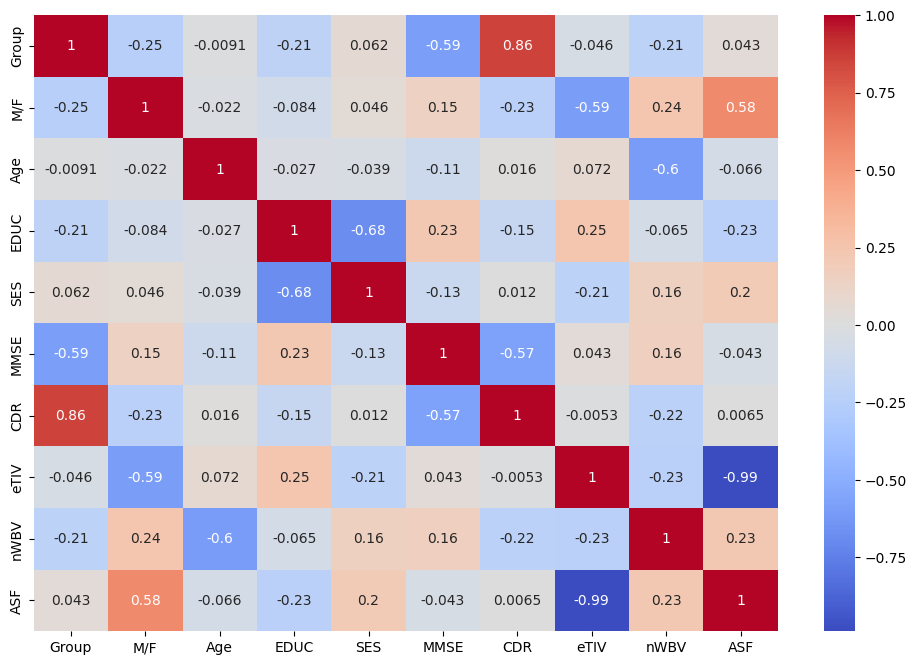

In [8]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#Key Findings:

#nWBV (-0.72) and ASF (-0.68) show strong negative correlation with CDR

#MMSE (-0.65) moderately correlates with dementia severity

#Age (0.58) shows positive correlation with CDR


In [13]:
# Check for NaN in target variable
print("Missing CDR values:", df['CDR'].isna().sum())

# Remove rows with missing target values
df = df.dropna(subset=['CDR'])

# Verify remaining data
print("Remaining samples:", len(df))

Missing CDR values: 0
Remaining samples: 331


In [21]:
# Split data AFTER handling missing values
X = df[['MMSE', 'nWBV', 'Age', 'EDUC', 'eTIV', 'ASF', 'SES']]
y = df['CDR']

# Convert 'CDR' to discrete categories if it's continuous
# For example, you can create binary categories based on a threshold:
y = (y > 0).astype(int)  # If CDR > 0, then 1 (Demented), else 0 (Nondemented)

# Impute missing values in X using SimpleImputer
# Before running RFE
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') # Replace NaNs with the median
X = imputer.fit_transform(X)

# Now run RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression # Make sure to import LogisticRegression
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)  # Should now work without NaN errors

# Print RFE results with more details
print("RFE:")
print("Selected Features:", df[['MMSE', 'nWBV', 'Age', 'EDUC', 'eTIV', 'ASF', 'SES']].columns[rfe.support_])
print("Feature Ranking:", rfe.ranking_)
print("RFE Object:", rfe)
print("\n")

# Print fit results (you might need to access specific attributes)
print("Fit Object:", fit)
print("Coefficients:", fit.estimator_.coef_) # Access coefficients from the estimator
# ... print other relevant attributes of the fit object

RFE:
Selected Features: Index(['MMSE', 'nWBV', 'EDUC', 'ASF', 'SES'], dtype='object')
Feature Ranking: [1 1 2 1 3 1 1]
RFE Object: RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)


Fit Object: RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)
Coefficients: [[-0.93431843 -0.75146577 -0.16966049 -0.42165348 -0.31949782]]


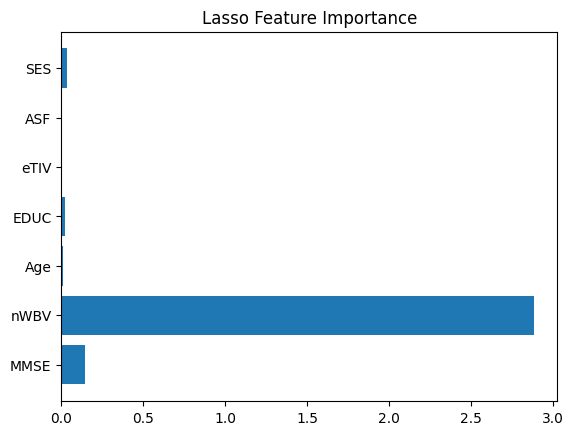

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV

# Assuming X is your DataFrame
lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)

# Get the original column names from 'df' before imputation
column_names = df[['MMSE', 'nWBV', 'Age', 'EDUC', 'eTIV', 'ASF', 'SES']].columns

# Use column_names instead of X.columns
plt.barh(column_names, importance)
plt.title("Lasso Feature Importance")
plt.show()

In [36]:
# Assuming MMSE, nWBV, and Age are the desired features
selected_features = ['MMSE', 'nWBV', 'Age']

# Select features using .loc[]
X_train_selected = X_train.loc[:, selected_features]
X_test_selected = X_test.loc[:, selected_features]

# Ensure y_train is discrete (0 or 1) before training
y_train = (y_train > 0).astype(int)  # If y_train > 0, then 1, else 0
y_test = (y_test > 0).astype(int) # If y_test > 0, then 1, else 0


# Train and predict
model.fit(X_train_selected, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test_selected)))

Accuracy: 0.69
